 ## Preparation 

In [5]:
import os 
import pandas as pd 
from statsbombpy import sb 
import warnings
warnings.filterwarnings("ignore", message="credentials were not supplied")

## Load

Tottenham Hotsupur vs Arsneal - the match occured on March 5, 2016

In [7]:
df_events= sb.events(match_id=3754318)

In [8]:
df_events

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Tottenham Hotspur,38,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Arsenal,1,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur,38,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Mathieu Flamini,6631.0,NaN,Arsenal,1,00:38:57.049,Substitution,NaN
3418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Joel Nathaniel Campbell Samuels,5581.0,NaN,Arsenal,1,00:44:17.407,Substitution,NaN
3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur,38,00:29:46.532,Error,NaN
3420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:48:33.954,Error,NaN


## Extract and Transform 

### Fix Timestamp 

In [9]:
df_events["timestamp"]= pd.to_timedelta(df_events.timestamp)

### Remove Events with No Location

In [10]:
df_pass = df_events[ ~pd.isna(df_events.location)].copy()

### Start (X, Y)

In [11]:
df_pass[["x_start", "y_start"]] = pd.DataFrame(
    df_pass.location.to_list(), 
    index= df_pass.index
)

In [12]:
df_pass.drop(columns="location", inplace=True)

### Pass Only

In [13]:
df_pass= df_pass[ (df_pass.type=="Pass")]

### End (X, Y)

In [14]:
df_pass[["x_end", "y_end"]] = pd.DataFrame(
    df_pass.pass_end_location.to_list(), 
    index=df_pass.index
) 

In [16]:
df_pass.drop(columns="pass_end_location", inplace=True)

## Write to File

In [17]:
path_data= "./data"

In [19]:
os.makedirs(path_data, exist_ok=True)

### Parquet (Full)

In [20]:
df_pass.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_shot_saved_off_target',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'match_id', 'minute', 'miscontrol_aerial_won',
       'off_camera', 'out', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_goal_assist', 'pass_height', 'pass_inswinging',
       'pass_length', 'pass_no_t

In [21]:
df_pass.to_parquet(
    os.path.join(path_data, "events_pass_full.parquet"),
    index=False
)

## CSV (Simplified)

In [22]:
df_simple= df_pass.loc[:, ["period", "team", "type", "x_start", "y_start", "x_end", "y_end"]]
df_simple

,period,team,type,x_start,y_start,x_end,y_end
6,1,Tottenham Hotspur,Pass,61.0,40.1,34.7,40.4
7,1,Tottenham Hotspur,Pass,39.2,43.1,81.1,68.3
8,1,Arsenal,Pass,44.2,0.1,79.8,6.8
9,1,Tottenham Hotspur,Pass,40.3,73.3,52.4,75.4
10,1,Tottenham Hotspur,Pass,52.4,75.4,60.9,67.8
...,...,...,...,...,...,...,...
903,2,Arsenal,Pass,15.4,53.0,75.5,71.8
904,2,Tottenham Hotspur,Pass,52.9,7.3,71.0,4.0
905,2,Tottenham Hotspur,Pass,88.4,0.1,80.2,3.6
906,2,Tottenham Hotspur,Pass,76.2,5.2,106.0,33.3


In [23]:
df_simple.to_csv(
    os.path.join(path_data, "events_pass_simple.csv"), 
    index= False
)

## Heat Map

In [24]:
import pandas as pd 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [25]:
df= pd.read_csv("./data/events_pass_simple.csv")

In [26]:
df

,period,team,type,x_start,y_start,x_end,y_end
0,1,Tottenham Hotspur,Pass,61.0,40.1,34.7,40.4
1,1,Tottenham Hotspur,Pass,39.2,43.1,81.1,68.3
2,1,Arsenal,Pass,44.2,0.1,79.8,6.8
3,1,Tottenham Hotspur,Pass,40.3,73.3,52.4,75.4
4,1,Tottenham Hotspur,Pass,52.4,75.4,60.9,67.8
...,...,...,...,...,...,...,...
897,2,Arsenal,Pass,15.4,53.0,75.5,71.8
898,2,Tottenham Hotspur,Pass,52.9,7.3,71.0,4.0
899,2,Tottenham Hotspur,Pass,88.4,0.1,80.2,3.6
900,2,Tottenham Hotspur,Pass,76.2,5.2,106.0,33.3


## Filter

### Tottenham Hotspur Only 

In [27]:
df.team.unique()

array(['Tottenham Hotspur', 'Arsenal'], dtype=object)

In [28]:
df= df[df.team== 'Tottenham Hotspur']

In [29]:
len(df)

482

### Second Half Only 

In [30]:
df.period.unique()

array([1, 2], dtype=int64)

In [31]:
df= df[df.period==2]

In [32]:
len(df)

209

## Pass Map 

In [34]:
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'
from mplsoccer import Pitch, VerticalPitch 

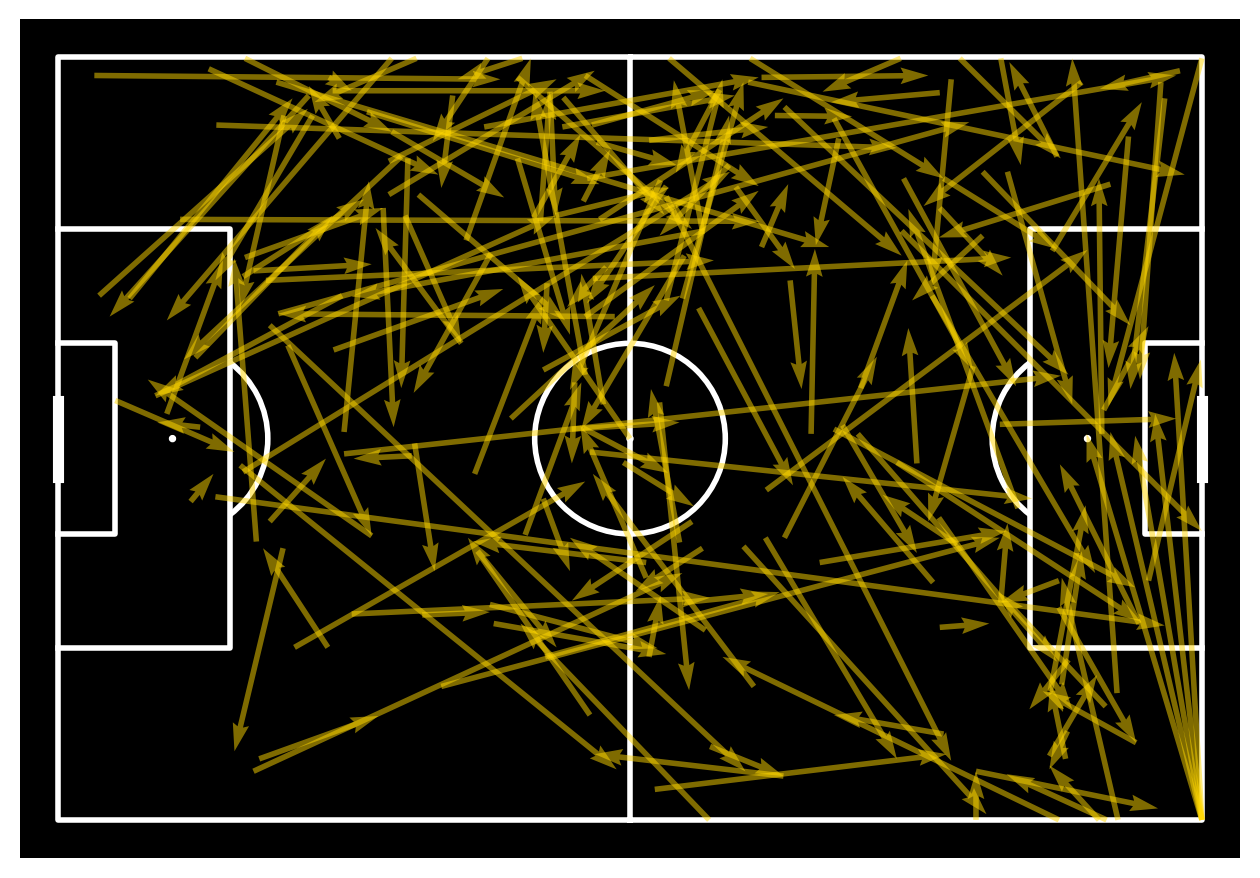

In [35]:
pitch = Pitch(
    pitch_type="statsbomb", 
    pitch_color="black", 
    line_color="white"
)

fig, ax= pitch.draw()

for row in df.itertuples():
    pitch.arrows(
        row.x_start, row.y_start, row.x_end, row.y_end, 
        ax=ax, color="gold", alpha=0.5, width=2
    )
    # pitch.scatter(row.x_start, row.y_start, ax=ax, color="gold")

plt.show()

## Heat Map 

kdeplot: kernel Density Estimate (KDE) plot 

### First Attempt 

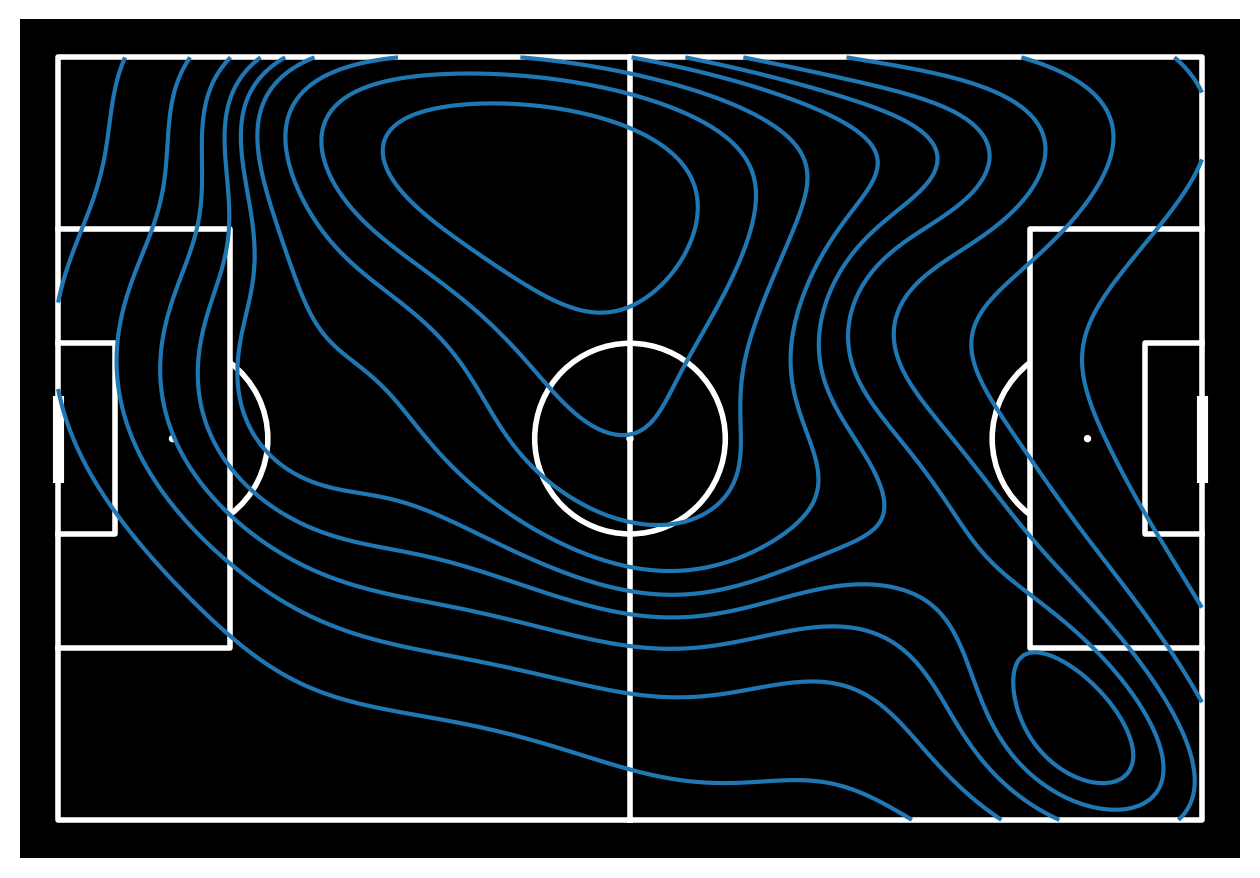

In [36]:
pitch = Pitch(
    pitch_type="statsbomb", 
    pitch_color="black", 
    line_color= "white"
) 

fig, ax= pitch.draw()

pitch.kdeplot(x=df.x_start, y=df.y_start, ax=ax)

plt.show()

## Fill 

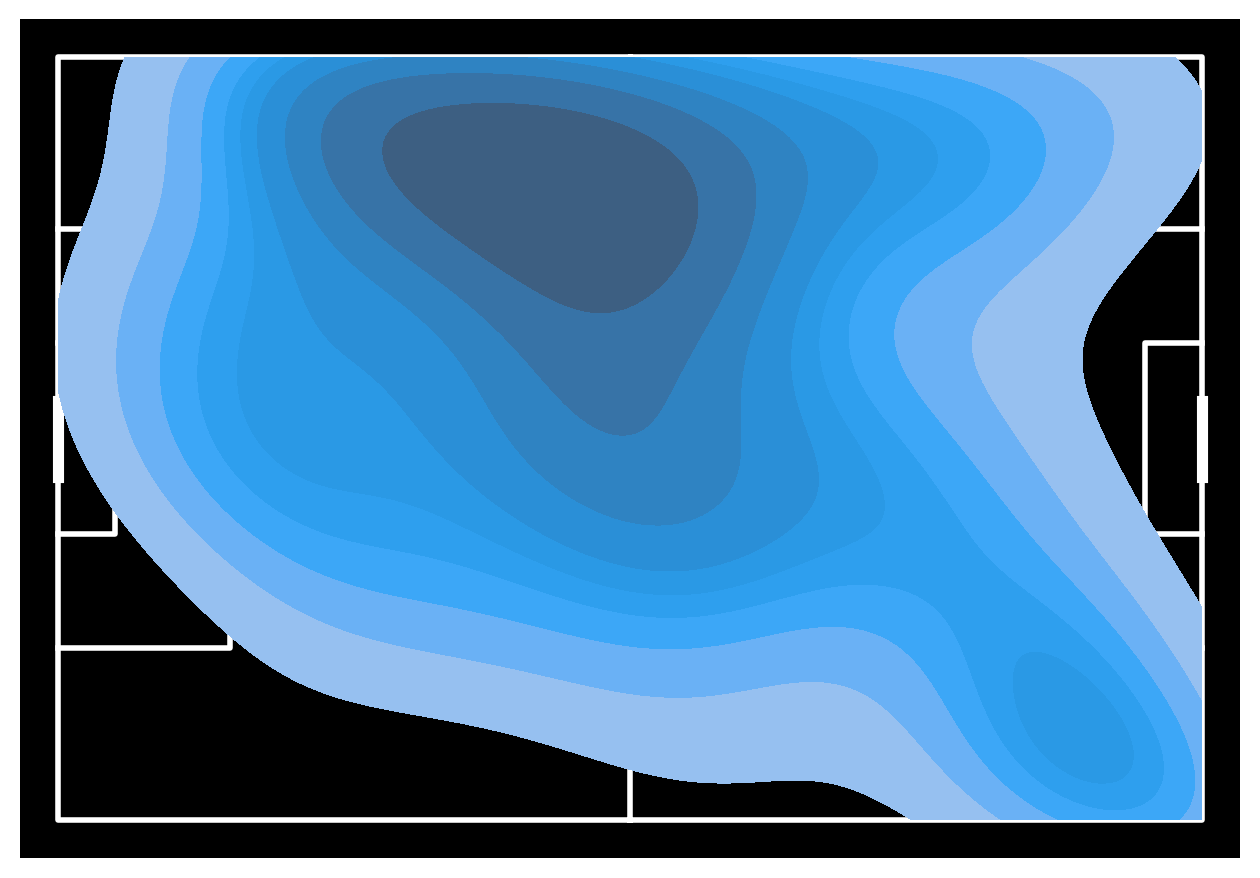

In [37]:
pitch = Pitch(
    pitch_type="statsbomb", 
    pitch_color= "black", 
    line_color= "white"
) 
fig, ax= pitch.draw() 

pitch.kdeplot(x=df.x_start, y=df.y_start, ax=ax, fill=True)
plt.show()

## Color 

In [38]:
import matplotlib 

In [39]:
custom_cmap= matplotlib.colors.LinearSegmentedColormap.from_list("custom_cmap", ["red", "black"])

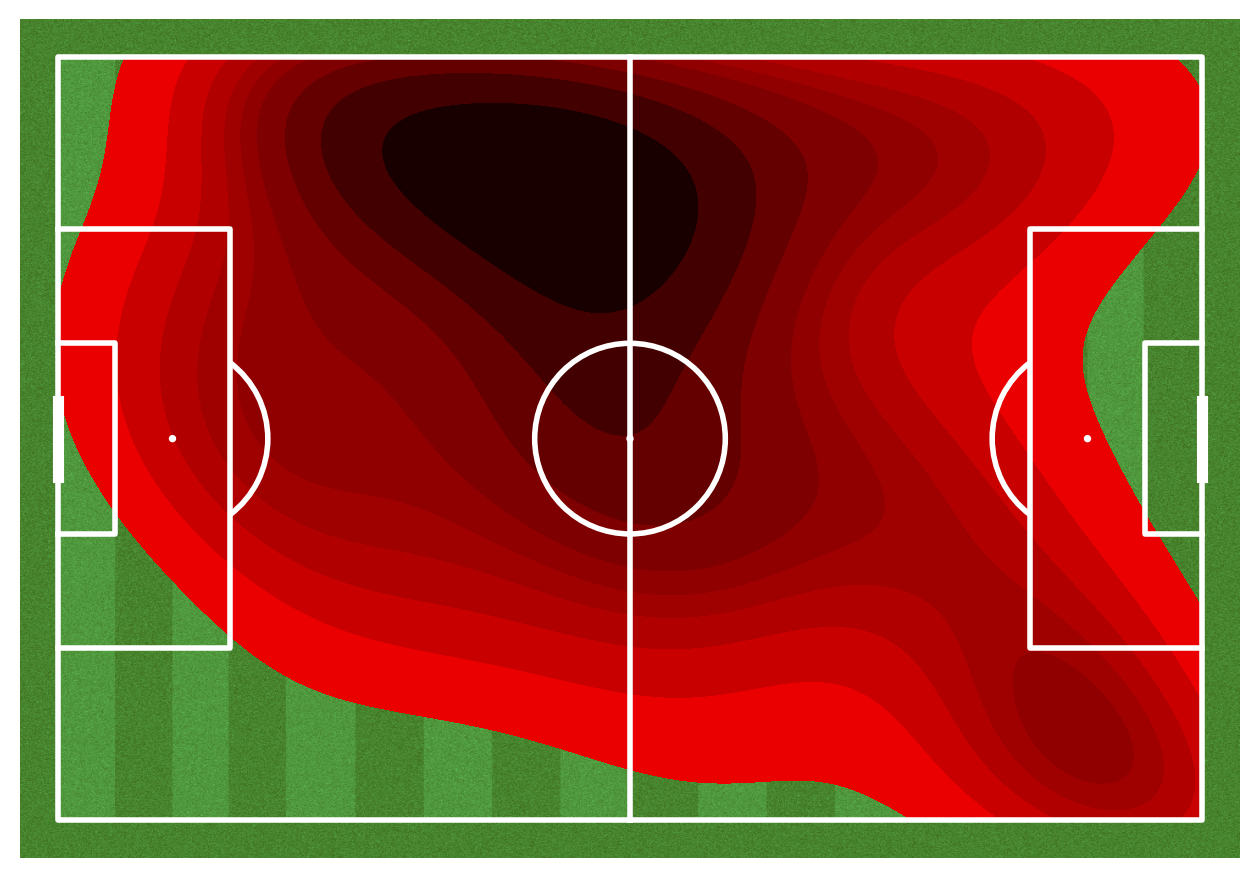

In [40]:
pitch= Pitch(
    pitch_type="statsbomb", 
    line_zorder=100, 
    pitch_color="grass", stripe= True, 
    line_color="white"
) 

fig, ax= pitch.draw() 

pitch.kdeplot(
    x= df.x_start, y=df.y_start, ax=ax, 
    fill= True,
    cmap=custom_cmap
) 

plt.show()

### Pass Start and End 

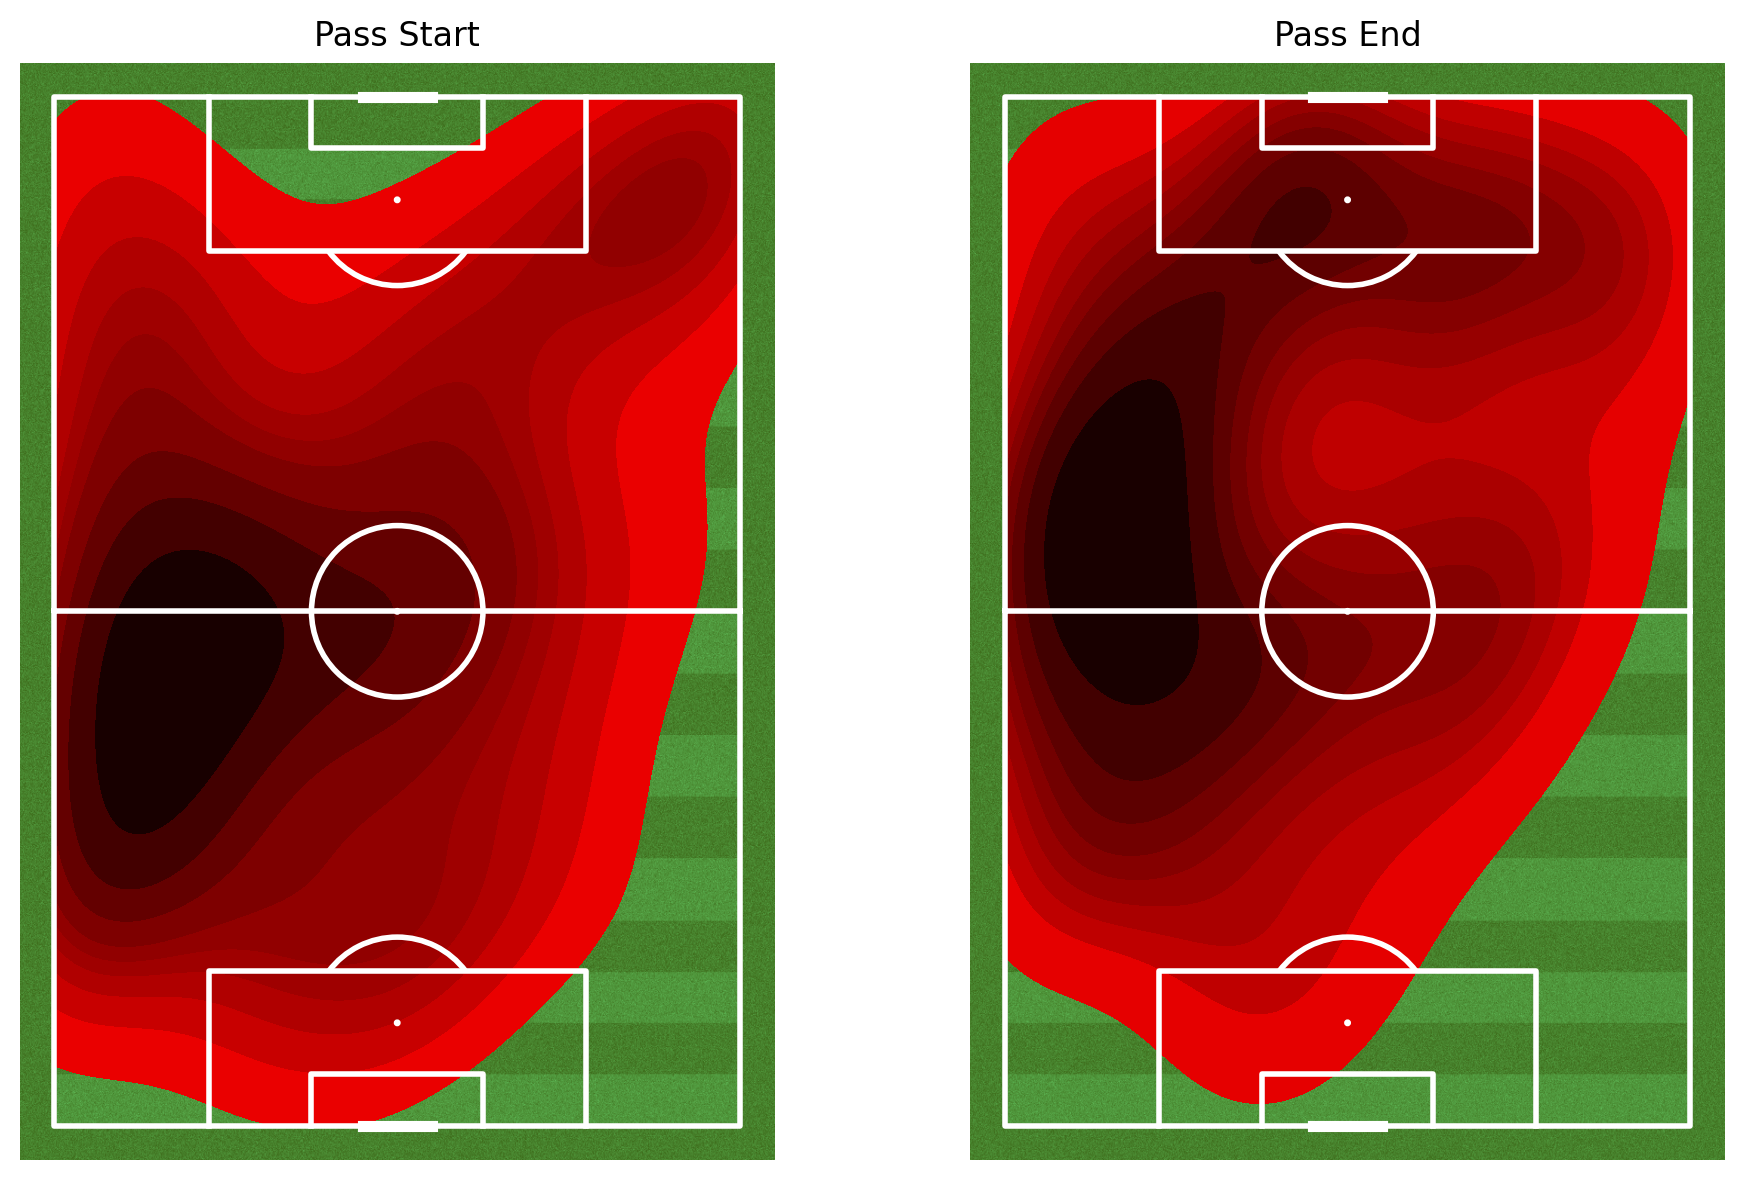

In [43]:
pitch= VerticalPitch(
    pitch_type="statsbomb", 
    line_zorder=100, 
    pitch_color="grass", stripe=True, 
    line_color="white"
) 

fig, ax= pitch.draw(nrows=1, ncols=2, figsize=(10, 6))

pitch.kdeplot(
    x=df.x_start, y=df.y_start, ax=ax[0], 
    fill=True, 
    cmap= custom_cmap
) 

pitch.kdeplot(
    x=df.x_end, y=df.y_end, ax=ax[1],
    fill=True, 
    cmap=custom_cmap
) 

ax[0].set_title("Pass Start") 
ax[1].set_title("Pass End") 

plt.show()